In [82]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

from gradvi.tests import toy_priors
from gradvi.tests import toy_data
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma
from gradvi.inference import Trendfiltering
from mrashpen.utils import R_trendfilter

def saveplot(fig, fileprefix, ext = 'png', plotdir = 'plots'):
    filename = f"{plotdir}/{fileprefix}.{ext}"
    fig.savefig(filename, bbox_inches = 'tight')
    return

plotprefix = 'doppler'

In [83]:
import special_data
n = 4096
data = special_data.doppler(n)

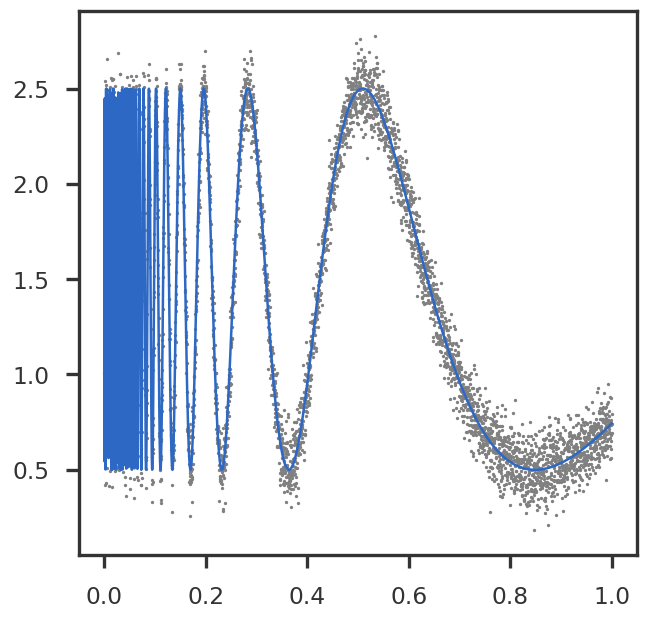

In [93]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.scatter(data.x, data.y, s = 1, color = 'gray')
ax.plot(data.x, data.ytrue)
plt.show()

In [85]:
tf_y, tf_fit = R_trendfilter.fit(data.y, order = 3)

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 



In [86]:
prior_init = toy_priors.get_ash(k = 20, sparsity = 0.9, skbase = 2.0, skfactor = 40.)
gv = Trendfiltering(maxiter = 20000, standardize_basis = False, standardize = True)
gv.fit(data.y, 3, prior_init, y_init = tf_y)
print (f"GradVI terminated in {gv.niter} iterations.")

GradVI terminated in 3842 iterations.


In [87]:
gv.prior.w

array([0.89999983, 0.00526317, 0.00526317, 0.00526317, 0.00526317,
       0.00526317, 0.00526317, 0.00526317, 0.00526317, 0.00526317,
       0.00526317, 0.00526317, 0.00526317, 0.00526317, 0.00526317,
       0.00526317, 0.00526317, 0.00526317, 0.00526317, 0.00526317])

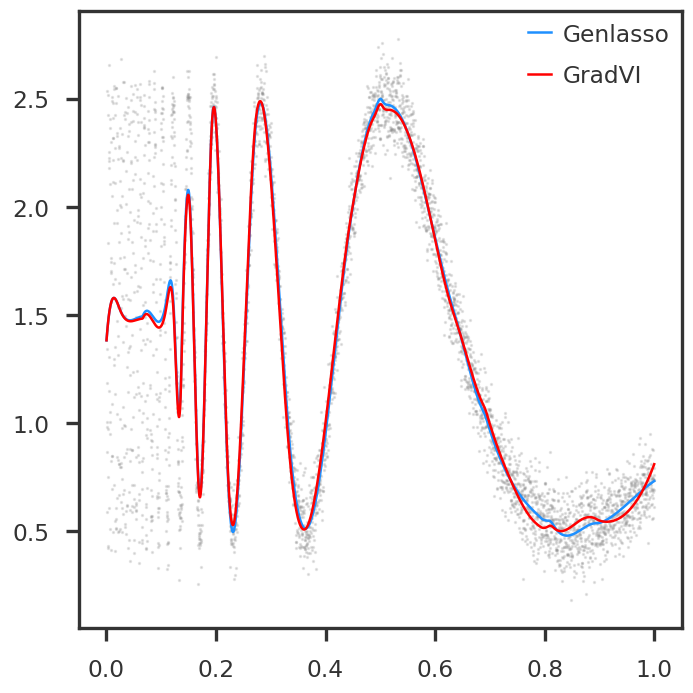

In [95]:
fig = plt.figure(figsize = (6, 6))
ax  = fig.add_subplot(1,1,1)
#ax.plot(data.x, data.ytrue, label = 'True', color = 'grey')
ax.scatter(data.x, data.y, s = 1, color = 'gray', alpha = 0.2)
ax.plot(data.x, tf_y, label = 'Genlasso', color = 'dodgerblue')
ax.plot(data.x, gv.ypred, label = 'GradVI', color = 'red')
ax.legend()

fig.tight_layout()
#fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()

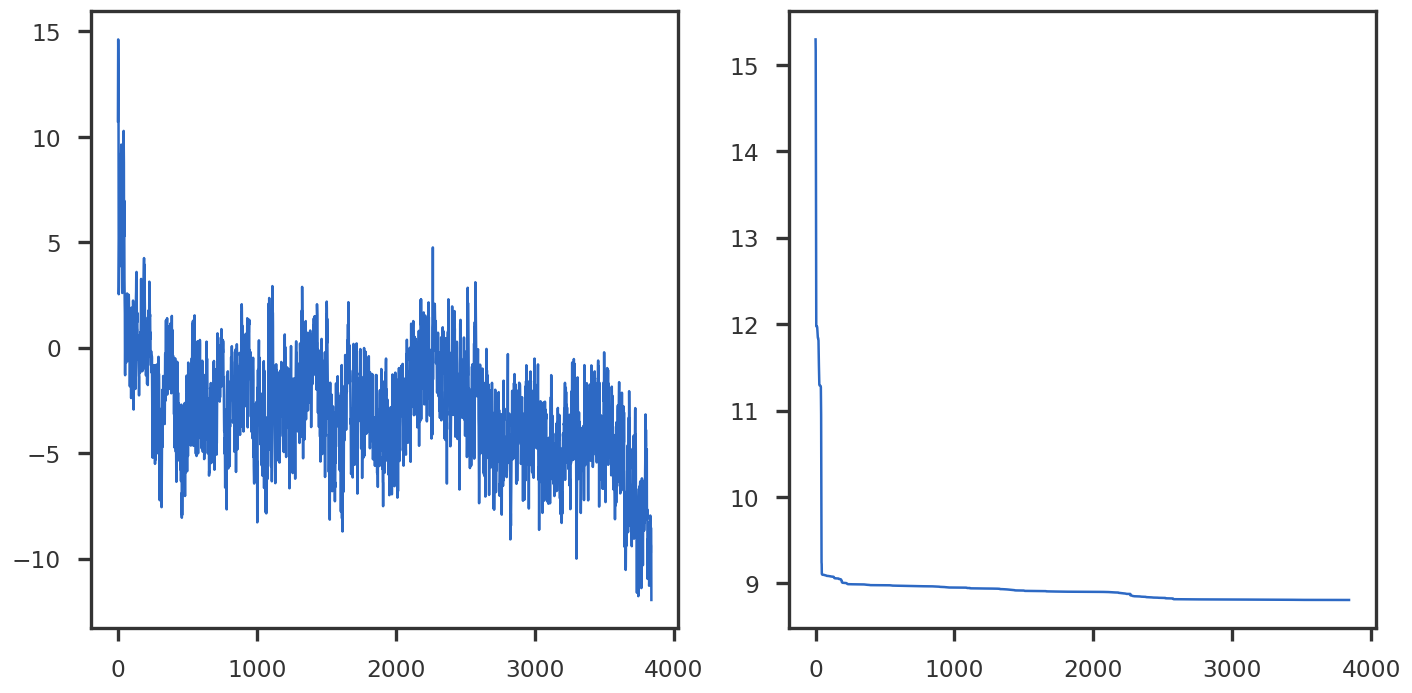

In [99]:
fig = plt.figure(figsize = (12, 6))

log_objdiff = np.log(-np.diff(gv.obj_path))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(np.arange(gv.niter - 1), log_objdiff)
ax2.plot(np.arange(gv.niter - 1), np.log(gv.obj_path[1:]))

fig.tight_layout()
plt.show()